<a href="https://colab.research.google.com/github/skywalker0803r/autorch/blob/main/examples/autorch_example_gpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install autorch
!git clone https://github.com/skywalker0803r/autorch

Cloning into 'autorch'...
remote: Enumerating objects: 171, done.
remote: Counting objects: 100% (171/171), done.
remote: Compressing objects: 100% (135/135), done.
remote: Total 171 (delta 69), reused 58 (delta 19), pack-reused 0
Receiving objects: 100% (171/171), 1.14 MiB | 20.92 MiB/s, done.
Resolving deltas: 100% (69/69), done.


In [3]:
from autorch.autorch.function import sp2wt
from autorch.autorch.utils import part
import torch
from torch import nn 
from tqdm import tqdm_notebook as tqdm

In [5]:
import pandas as pd
import numpy as np
import joblib
c = joblib.load('/content/drive/MyDrive/台塑輕油案子/data/phase2/dataset/col_names.pkl')
df = pd.read_csv('/content/drive/MyDrive/台塑輕油案子/data/phase2/dataset/train.csv',index_col=0)

In [6]:
# test sp2wt
x = df[c["xna"]].values
s = df[c["shc"]].values
wt = df[c["xhc"]].values
wt_p = sp2wt(x,s)
np.allclose(wt,wt_p)

True

In [7]:
# define columns,normalize_idx
x_col = c['case'] + c['xna']
y_col = c['sle'] + c['shc'] + c['she']
normalize_idx = [[y_col.index(c['sle'][i]),y_col.index(c['shc'][i]),y_col.index(c['she'][i])]for i in range(len(c['xna']))]
normalize_idx

[[0, 54, 108],
 [1, 55, 109],
 [2, 56, 110],
 [3, 57, 111],
 [4, 58, 112],
 [5, 59, 113],
 [6, 60, 114],
 [7, 61, 115],
 [8, 62, 116],
 [9, 63, 117],
 [10, 64, 118],
 [11, 65, 119],
 [12, 66, 120],
 [13, 67, 121],
 [14, 68, 122],
 [15, 69, 123],
 [16, 70, 124],
 [17, 71, 125],
 [18, 72, 126],
 [19, 73, 127],
 [20, 74, 128],
 [21, 75, 129],
 [22, 76, 130],
 [23, 77, 131],
 [24, 78, 132],
 [25, 79, 133],
 [26, 80, 134],
 [27, 81, 135],
 [28, 82, 136],
 [29, 83, 137],
 [30, 84, 138],
 [31, 85, 139],
 [32, 86, 140],
 [33, 87, 141],
 [34, 88, 142],
 [35, 89, 143],
 [36, 90, 144],
 [37, 91, 145],
 [38, 92, 146],
 [39, 93, 147],
 [40, 94, 148],
 [41, 95, 149],
 [42, 96, 150],
 [43, 97, 151],
 [44, 98, 152],
 [45, 99, 153],
 [46, 100, 154],
 [47, 101, 155],
 [48, 102, 156],
 [49, 103, 157],
 [50, 104, 158],
 [51, 105, 159],
 [52, 106, 160],
 [53, 107, 161]]

In [8]:
import numpy as np
for i in range(54):
  assert np.allclose(df[y_col].iloc[:,normalize_idx[i]].sum(axis=1).mean(),1.0)

  0%|          | 1/300 [00:00<04:40,  1.06it/s]

epoch:0 train_loss:0.0127 valid_loss:0.0037


 17%|█▋        | 51/300 [00:40<03:14,  1.28it/s]

epoch:50 train_loss:0.0003 valid_loss:0.0004


 34%|███▎      | 101/300 [01:19<02:34,  1.29it/s]

epoch:100 train_loss:0.0002 valid_loss:0.0004


 50%|█████     | 151/300 [01:58<01:57,  1.27it/s]

epoch:150 train_loss:0.0001 valid_loss:0.0004


 67%|██████▋   | 201/300 [02:37<01:17,  1.28it/s]

epoch:200 train_loss:0.0001 valid_loss:0.0004


 84%|████████▎ | 251/300 [03:17<00:38,  1.28it/s]

epoch:250 train_loss:0.0001 valid_loss:0.0003


100%|██████████| 300/300 [03:55<00:00,  1.27it/s]


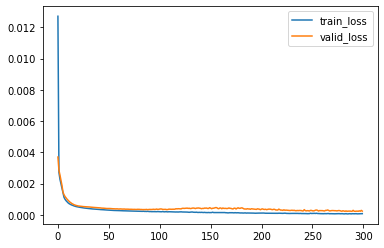

Sequential(
  (0): Linear(in_features=58, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=162, bias=True)
  (5): Sigmoid()
)

In [9]:
part1 = part.PartBulider(df,x_col,y_col,
normalize_idx_list=normalize_idx,
device="cuda:0")
part1.train()

In [10]:
part1.test()

,R2,MSE,MAPE
Individual Component to Light End Split Factor_Oxygen_Ratio,0,2.81795e-08,0.0119166
Individual Component to Light End Split Factor_Methane_Ratio,0,2.8567e-08,0.0117871
Individual Component to Light End Split Factor_Ethane_Ratio,0,2.82391e-08,0.0119385
Individual Component to Light End Split Factor_Propane_Ratio,0.989532,2.48624e-07,0.031502
Individual Component to Light End Split Factor_n-Butane_Ratio,0.988212,1.36808e-06,0.0756714
...,...,...,...
Individual Component to Heavy End Split Factor_n-Pentylbenzene_Ratio,0.984885,5.26933e-05,0.808795
Individual Component to Heavy End Split Factor_n-Dodecane_Ratio,0.995025,5.34738e-05,inf
Individual Component to Heavy End Split Factor_n-Hexylbenzene_Ratio,0.986189,5.6588e-05,inf
Individual Component to Heavy End Split Factor_n-Tridecane_Ratio,0,2.85905e-08,0.0117459


In [12]:
part1.device = "cpu"
part1.net.to("cpu")
part1.test()

,R2,MSE,MAPE
Individual Component to Light End Split Factor_Oxygen_Ratio,0,2.81795e-08,0.0119166
Individual Component to Light End Split Factor_Methane_Ratio,0,2.8567e-08,0.0117871
Individual Component to Light End Split Factor_Ethane_Ratio,0,2.82391e-08,0.0119385
Individual Component to Light End Split Factor_Propane_Ratio,0.989532,2.48624e-07,0.031502
Individual Component to Light End Split Factor_n-Butane_Ratio,0.988212,1.36808e-06,0.0756714
...,...,...,...
Individual Component to Heavy End Split Factor_n-Pentylbenzene_Ratio,0.984885,5.26933e-05,0.808795
Individual Component to Heavy End Split Factor_n-Dodecane_Ratio,0.995025,5.34738e-05,inf
Individual Component to Heavy End Split Factor_n-Hexylbenzene_Ratio,0.986189,5.6588e-05,inf
Individual Component to Heavy End Split Factor_n-Tridecane_Ratio,0,2.85905e-08,0.0117459


In [13]:
# get wt% predict 
x_test = part1.data["X_test"]
s_real = part1.data["Y_test"]
s_pred = part1.predict(x_test)
idx = x_test.index
 
wt_real = df.loc[idx,c["xle"]+c["xhc"]+c["xhe"]]
 
xna = x_test[c["xna"]].values
sle = s_pred[c['sle']].values
shc = s_pred[c["shc"]].values
she = s_pred[c["she"]].values
 
wt_pred = np.hstack((sp2wt(xna,sle),sp2wt(xna,shc),sp2wt(xna,she)))
wt_pred = pd.DataFrame(wt_pred,columns=wt_real.columns)

In [14]:
pd.options.display.max_rows = 999
result = part1.show_metrics(wt_real,wt_pred)
result

,R2,MSE,MAPE
Light End Product Properties_Oxygen_wt%,1,0,NaN
Light End Product Properties_Methane_wt%,1,0,NaN
Light End Product Properties_Ethane_wt%,1,0,NaN
Light End Product Properties_Propane_wt%,0.997684,0.000111206,NaN
Light End Product Properties_n-Butane_wt%,0.998637,0.00025014,NaN
Light End Product Properties_i-Pentane_wt%,0.998295,0.0203179,0.847241
Light End Product Properties_n-Pentane_wt%,0.99812,0.0700873,0.838249
Light End Product Properties_tr2-Pentene_wt%,0.999206,6.43563e-06,NaN
Light End Product Properties_Cyclopentane_wt%,0.999375,0.000386651,NaN
Light End Product Properties_3-Methylpentane_wt%,0.998902,0.0225527,0.814135


In [15]:
import joblib
joblib.dump(part1,'part1.pkl')

['part1.pkl']

In [16]:
result.to_csv('result(162wt%)')